# Libraries and Data Load

## Load Libraries

In [19]:
######################################################Initial Packages########################################################
#Basic Operating System Stuff
import os
import gc #garbage collector
import random #random seed generator
import pandas_profiling # requires import and prior install 

#Timer
from timeit import default_timer as timer #import a timer

#Basic dataframe, array, and math stuff
import pandas as pd #data frame
from pandas_profiling import ProfileReport
import math #math functions
import numpy as np    #numerical package
from patsy import dmatrix, demo_data, ContrastMatrix, Poly

#Scikit learn
from math import sqrt
import sklearn as sk  #scikit learn
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression as LR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample #sampling
from sklearn.model_selection import train_test_split as tts, KFold #train test split
from sklearn.decomposition import PCA #principal components
from imblearn.over_sampling import SMOTE #synthetic minority oversampling technique
from sklearn.metrics import classification_report as CR,confusion_matrix, roc_curve, plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve, average_precision_score #for 2-class model
from sklearn.preprocessing import MinMaxScaler as Scaler, StandardScaler as Scaler2, PolynomialFeatures as poly # used for variable scaling data
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.ensemble import RandomForestClassifier as RFC, ExtraTreesClassifier as ETC, GradientBoostingClassifier as GBC,AdaBoostClassifier as ABC  # Random Forest package
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.pipeline import make_pipeline


from scipy import misc, stats as st #Lots of stuff here
import itertools

import statsmodels.api as sm
import pyreadstat

#Graphing
import seaborn as sns
import pydot  #For model plotting
import graphviz #python-graphviz package
from IPython.display import SVG #Same here
import matplotlib.pyplot as plt #plotting
import matplotlib #image save
from matplotlib.pyplot import imshow #Show images
from PIL import Image #Another image utility
import cv2 #more image utilities

%matplotlib inline

os.chdir('D:\Bankrupt')
##############################################################################################################################

## Load Data

In [20]:
##############################################################################################################################
mydata=pd.read_csv('bankrupt2.csv')
mydata.shape
##############################################################################################################################

(3222, 34)

# Data Preparation

## Handle Missing

### Columns

In [21]:
a=mydata.isnull().sum() #count the nulls by column
print(a.sort_values(ascending=False).head(10))

Hospital_Compare             354
HCAHPS_Star_Rating           349
Facility_Age                 322
Debt_Equty_Ratio             308
Medicaid_Days                251
Market_Concentration         235
HCAHPS_Recommend             194
Serious_Complication_Rate    156
Days_Cash_on_Hand             82
Cash_on_Hand                  82
dtype: int64


In [22]:
mydata=mydata.drop(columns=['Hospital_Compare','HCAHPS_Star_Rating', 'Quick_Ratio', 
                            'Total_Liabilities', 'Affiliated_Physicians', 'Labor_Compensation_Ratio',
                            'Other_Pay_Days','Cash_on_Hand'])

### Rows


In [23]:
pd.set_option('display.max_rows', 500)
b=mydata.isnull().sum(axis=1) #count the nulls by column
b=b.sort_values(ascending=False)
#print(b.head(101))

In [24]:
todrop=b.head(101).index
todrop

Int64Index([ 181, 1903, 3004, 2985, 1421, 3046, 2215, 1739, 1738, 1737,
            ...
            1888, 3197, 2585, 2706, 2113, 2219, 3193, 1883, 3195, 2180],
           dtype='int64', length=101)

## Drop the Rows and Plot Missing

<AxesSubplot:>

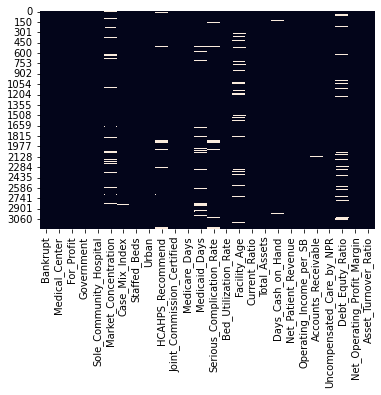

In [25]:
mydata = mydata.drop(todrop)                    
sns.heatmap(mydata.isnull(), cbar=False)

## Impute Median
Given the small number of missing values remaining, impute median.

missing: 0.015281098267320633
(3121, 26)


<AxesSubplot:>

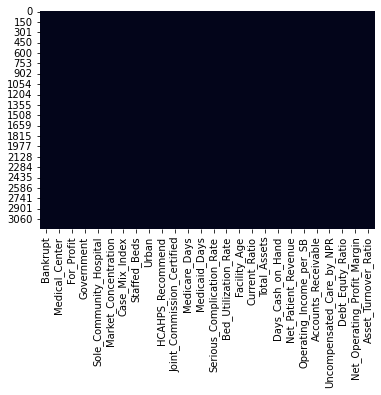

In [26]:
num=mydata.isna().sum().sum()
den=mydata.shape[0]*mydata.shape[1]
print('missing:', num/den)
mydata=mydata.fillna(mydata.median())
print(mydata.shape)
sns.heatmap(mydata.isnull(), cbar=False)

# Describe

In [27]:
pd.set_option('display.max_columns', None)
mydata.describe()

,Bankrupt,Medical_Center,For_Profit,Government,Sole_Community_Hospital,Market_Concentration,Case_Mix_Index,Staffed_Beds,Urban,HCAHPS_Recommend,Joint_Commission_Certified,Medicare_Days,Medicaid_Days,Serious_Complication_Rate,Bed_Utilization_Rate,Facility_Age,Current_Ratio,Total_Assets,Days_Cash_on_Hand,Net_Patient_Revenue,Operating_Income_per_SB,Accounts_Receivable,Uncompensated_Care_by_NPR,Debt_Equty_Ratio,Net_Operating_Profit_Margin,Asset_Turnover_Ratio
count,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3.121000e+03,3121.000000,3.121000e+03,3.121000e+03,3.121000e+03,3121.000000,3121.000000,3121.000000,3.121000e+03
mean,0.008651,0.057674,0.248318,0.137136,0.150593,0.336735,1.634781,192.475489,0.315604,0.706088,0.240628,0.357626,0.091778,0.989676,0.494396,13.313178,6.277988,4.178695e+08,46.768023,2.991555e+08,5.685553e+03,1.049343e+08,0.079929,1.116959,-0.026075,4.257932e+03
std,0.092623,0.233163,0.432106,0.344045,0.357709,0.314107,0.369100,185.828966,0.464830,0.094490,0.427533,0.129987,0.087715,0.191403,0.203295,9.424979,121.428594,1.173058e+09,141.668756,4.366037e+08,9.133121e+05,1.982820e+08,0.099637,21.456153,0.390748,2.377892e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.710000,1.000000,0.000000,0.270000,0.000000,0.000000,0.000000,0.460000,0.000000,1.070000,-177.400000,-4.229379e+08,-690.800000,-6.128715e+07,-2.058274e+07,-8.254052e+07,-2.525326,-179.250000,-8.350000,-6.943627e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,1.410000,61.000000,0.000000,0.650000,0.000000,0.270000,0.030000,0.890000,0.340000,7.770000,1.100000,5.455047e+07,0.100000,7.140649e+07,-8.773119e+04,1.847810e+07,0.038056,0.010000,-0.090000,7.227683e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,1.590000,134.000000,0.000000,0.710000,0.000000,0.350000,0.060000,0.960000,0.510000,11.750000,1.900000,1.460050e+08,9.500000,1.616037e+08,5.770605e+02,4.542472e+07,0.064015,0.200000,0.000000,1.087797e+00
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.510000,1.800000,260.000000,1.000000,0.770000,0.000000,0.440000,0.120000,1.050000,0.650000,16.300000,3.100000,3.845289e+08,44.100000,3.505475e+08,1.116392e+05,1.117253e+08,0.098610,0.640000,0.080000,1.634588e+00
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.260000,2247.000000,1.000000,1.000000,1.000000,0.990000,0.820000,4.370000,1.000000,74.460000,5102.400000,1.893337e+10,2318.000000,5.951047e+09,3.443893e+07,3.711121e+09,2.028850,741.950000,13.030000,1.328431e+07


# Build Training and Test Set, Oversample, Scale

In [28]:
##############################################################################################################################
# Seed value for random number generators to obtain reproducible results
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
temp=mydata
temp=temp.values
tempy=temp[:,0].astype('int')
tempx=temp[:,1:len(temp)]

train, test=tts(temp,test_size=.5, random_state=31)
temp=pd.DataFrame(train)
temp=temp[temp.iloc[:,0]==1]
train=pd.DataFrame(train)

z=0
for i in np.arange(120):
    tmp=temp.sample(frac=1, replace=True, random_state=z)
    z=z+1
    train=pd.concat([train,tmp])
    
print(np.mean(pd.DataFrame(train)[0]))
train=pd.DataFrame(train)
test=pd.DataFrame(test)
y_train=train.iloc[:,0]
X_train=train.iloc[:,1:len(train)]
y_test=test.iloc[:,0]
X_test=test.iloc[:,1:len(test)]





##############################################################################################################################

0.5041666666666667


# Scaling

In [29]:
myscaler=Scaler2()
tmp=myscaler.fit(X_train)
X_train=tmp.fit_transform(X_train)
X_test=tmp.fit_transform(X_test)
print(X_train.shape, X_test.shape)
print(np.unique(y_train,return_counts=True), np.unique(y_test, return_counts=True))

(3120, 25) (1561, 25)
(array([0., 1.]), array([1547, 1573], dtype=int64)) (array([0., 1.]), array([1547,   14], dtype=int64))


# Functions for Confusion Matrix and PR Plot

In [30]:
def myf(mod):
    y_hat=mod.predict(X_test).astype(int) #can use either encoded or decoded data..doesn't help
    results=pd.DataFrame(CR(y_test, y_hat, output_dict=True))
    try:  
        plot_confusion_matrix(mod,X_test,y_test)
    except:
        print('No confusion plot.')
    return(results)

def prplot(mod):
    average_precision = average_precision_score(y_test, mod.predict(X_test))
    disp = plot_precision_recall_curve(mod, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# Logistic Regression Models

                   0.0        1.0  accuracy    macro avg  weighted avg
precision     0.997159   0.021782  0.681614     0.509471      0.988411
recall        0.680672   0.785714  0.681614     0.733193      0.681614
f1-score      0.809066   0.042389  0.681614     0.425728      0.802190
support    1547.000000  14.000000  0.681614  1561.000000   1561.000000


,LR_coef,SE,Odds_Ratio,OR_Lower_5%,OR_Upper_5%,Z,p_value
Joint_Commission_Certified,-3.591525,0.453186,0.027556,0.011336,0.066985,-7.925063,0.000
HCAHPS_Recommend,-3.517976,0.255964,0.029659,0.017959,0.048983,-13.744051,0.000
Accounts_Receivable,-2.978094,0.961498,0.050890,0.007730,0.335022,-3.097349,0.001
Net_Patient_Revenue,-2.786968,1.839594,0.061608,0.001674,2.267405,-1.514991,0.065
Government,-2.476895,0.478167,0.084004,0.032906,0.214448,-5.179975,0.000
Current_Ratio,-2.457349,1.025309,0.085662,0.011482,0.639070,-2.396690,0.008
Uncompensated_Care_by_NPR,-1.921309,0.271931,0.146415,0.085924,0.249493,-7.065429,0.000
Staffed_Beds,-1.811651,0.618440,0.163384,0.048616,0.549082,-2.929387,0.002
Bed_Utilization_Rate,-1.793179,0.227218,0.166430,0.106615,0.259803,-7.891889,0.000
Debt_Equty_Ratio,-1.625254,0.896210,0.196862,0.033985,1.140329,-1.813475,0.035


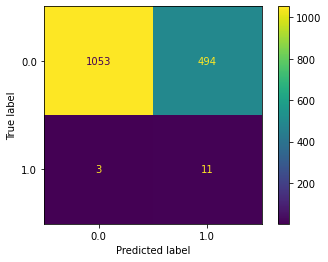

In [47]:
##############################################################################################################################
mylr=LR(fit_intercept = True) #logistic model
mylr.fit(X_train, y_train)  #Fit on training data 
print(myf(mylr)) #predict on test set and plot
feature_names = mydata.columns[1:len(mydata)]
lrdf=pd.DataFrame(np.squeeze(mylr.coef_), columns=['LR_coef'])
lrdf.index=np.squeeze(feature_names)
predProbs = mylr.predict_proba(X_train)
X_design = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
V = np.diagflat(np.product(predProbs, axis=1))
covLogit = np.linalg.inv(np.dot(np.dot(X_design.T, V), X_design))
lrdf['SE']=np.sqrt(np.diag(covLogit))[1:26]

lrdf['Odds_Ratio']=np.exp(lrdf['LR_coef'])
lrdf['OR_Lower_5%']=np.exp(lrdf['LR_coef']-1.96*lrdf['SE'])
lrdf['OR_Upper_5%']=np.exp(lrdf['LR_coef']+1.96*lrdf['SE'])
lrdf['Z']=lrdf['LR_coef']/lrdf['SE']
from scipy.stats import norm
lrdf['p_value']=np.round(1-norm.cdf(abs(lrdf['Z'])),3)
lrdf.sort_values(by=['Odds_Ratio'], ascending=True)

##############################################################################################################################

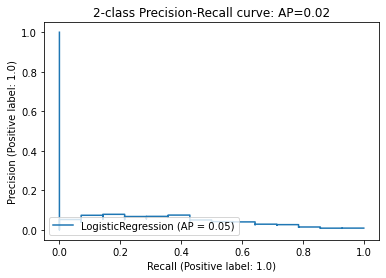

In [32]:
prplot(mylr)

<AxesSubplot:>

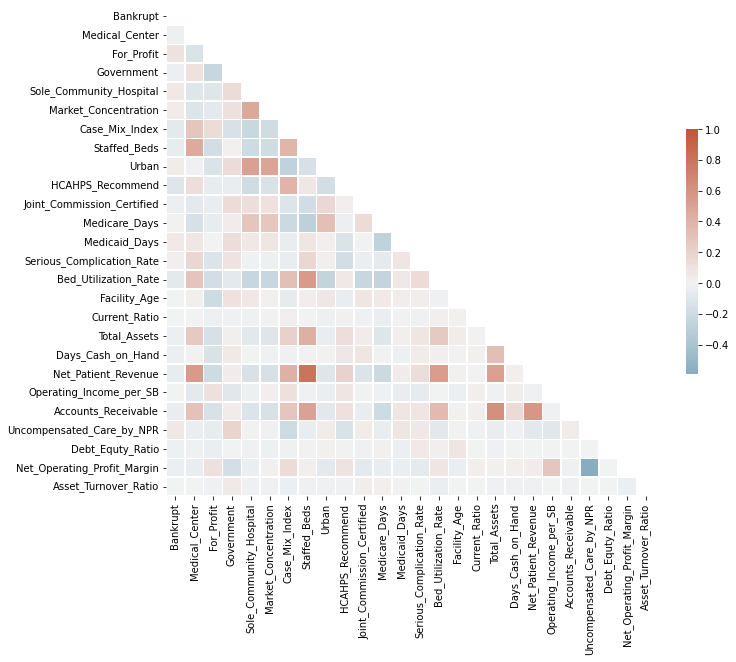

In [33]:
corr = mydata.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Linear SVM Classifier

                   0.0        1.0  accuracy    macro avg  weighted avg
precision     0.997207   0.022587  0.693145     0.509897      0.988466
recall        0.692308   0.785714  0.693145     0.739011      0.693145
f1-score      0.817245   0.043912  0.693145     0.430579      0.810310
support    1547.000000  14.000000  0.693145  1561.000000   1561.000000


,SGD_coef,SGD_abscoef
Net_Patient_Revenue,-6.909438,6.909438
Joint_Commission_Certified,-6.891023,6.891023
Accounts_Receivable,-6.123899,6.123899
Current_Ratio,-5.304661,5.304661
Government,-4.964480,4.964480
HCAHPS_Recommend,-3.853522,3.853522
Total_Assets,-3.169027,3.169027
Medical_Center,-2.252546,2.252546
Debt_Equty_Ratio,-2.066996,2.066996
Bed_Utilization_Rate,-2.057707,2.057707


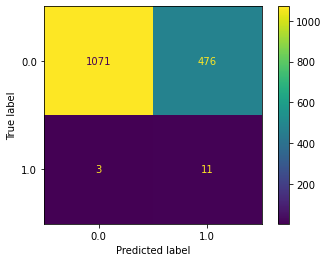

In [34]:
mysgd=SGD(loss='hinge', fit_intercept=True, random_state=43)
mysgd.fit(X_train,y_train)
print(myf(mysgd))
sgddf=pd.DataFrame(np.squeeze(mysgd.coef_), columns=['SGD_coef'])
sgddf.index=np.squeeze(feature_names)
sgddf['SGD_abscoef']=abs(sgddf['SGD_coef'])
sgddf.sort_values(by=['SGD_abscoef'], ascending=False)

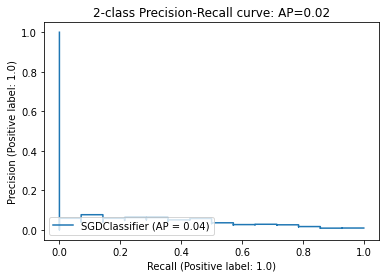

In [16]:
prplot(mysgd)

# Neural Network

                   0.0        1.0  accuracy    macro avg  weighted avg
precision     0.997132   0.021359  0.675208     0.509246      0.988381
recall        0.674208   0.785714  0.675208     0.729961      0.675208
f1-score      0.804474   0.041588  0.675208     0.423031      0.797632
support    1547.000000  14.000000  0.675208  1561.000000   1561.000000


,NN_coef,NN_abscoef
Asset_Turnover_Ratio,-33.780642,33.780642
Accounts_Receivable,-24.281994,24.281994
Net_Patient_Revenue,-24.137782,24.137782
Government,-20.977832,20.977832
Joint_Commission_Certified,-20.169403,20.169403
Current_Ratio,-18.471986,18.471986
HCAHPS_Recommend,-16.176671,16.176671
Debt_Equty_Ratio,-11.635276,11.635276
Total_Assets,-11.006601,11.006601
Uncompensated_Care_by_NPR,-10.876682,10.876682


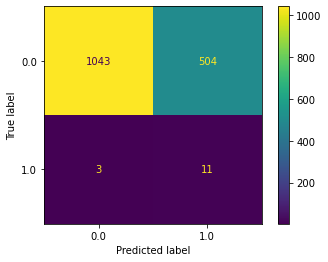

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
#nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1,3,6), random_state=1)
nn=Perceptron(random_state=2)
nn.fit(X_train, y_train)
print(myf(nn))
nndf=pd.DataFrame(np.squeeze(nn.coef_), columns=['NN_coef'])
nndf.index=np.squeeze(feature_names)
nndf['NN_abscoef']=abs(nndf['NN_coef'])
nndf.sort_values(by=['NN_abscoef'], ascending=False)

# Naive Bayes

                   0.0        1.0  accuracy    macro avg  weighted avg
precision     0.997132   0.021359  0.675208     0.509246      0.988381
recall        0.674208   0.785714  0.675208     0.729961      0.675208
f1-score      0.804474   0.041588  0.675208     0.423031      0.797632
support    1547.000000  14.000000  0.675208  1561.000000   1561.000000


C:\Users\tf\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


,NB_coef,NB_abscoef
Medical_Center,-7.362011,7.362011
Joint_Commission_Certified,-7.362011,7.362011
Net_Patient_Revenue,-7.362011,7.362011
Accounts_Receivable,-7.362011,7.362011
Total_Assets,-7.362011,7.362011
Government,-7.362011,7.362011
HCAHPS_Recommend,-2.599837,2.599837
Current_Ratio,-2.502198,2.502198
Debt_Equty_Ratio,-1.889740,1.889740
Case_Mix_Index,-1.860752,1.860752


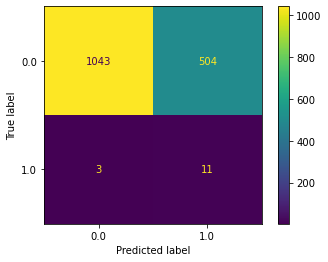

In [42]:
from sklearn.naive_bayes import BernoulliNB as NB
nb = NB()
nb.fit(X_train, y_train)
print(myf(nn))
nbdf=pd.DataFrame(np.squeeze(nb.coef_), columns=['NB_coef'])
nbdf.index=np.squeeze(feature_names)
nbdf['NB_abscoef']=abs(nbdf['NB_coef'])
nbdf.sort_values(by=['NB_abscoef'], ascending=False)
